### Student Information
Name: 蘇立光

Student ID: 110000162

GitHub ID: 92088440

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [384]:
### Begin Assignment Here

1. Part 2 is the DMLab1-homework Cose part
2. With Part 3, it is a little bit all over the place, so I have marked part of the code with "!!!Part 3" (without quotation mark, use ctrl+F to find them quickly)
   - For new data visualizations, I used wordCloud to make new data visualization, please run the "pip install wordCloud" first in the kernel below. Ypu can find the wordClouds after the plotly chart in the new dataset in both the word frequency version and the TF-IDF version
   - For the TF-IDF vectorization, I mark that part with "Using TF - IDF"
   - For the Naive Bayes classifier, there are 2 part (because of 2 classifier), the first part is the word frequency version (at Part 2), and the second part is the TF-IDF (at the TD-IDF)
3. Part 4 is at the bottom, I didn't really implement the fixes/improvements that I talk about there

Run the codes in order, hehe

In [385]:
pip install wordcloud

In [386]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exercise 2

In [387]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk

# External modules
import helpers.data_mining_helpers as dmh

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [388]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# a simple query
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [389]:
#Answer here

# Filter rows by category
X[X['category_name'] == 'alt.atheism']

,text,category,category_name
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
17,Organization: Penn State University From: <JSN...,0,alt.atheism
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
...,...,...,...
2231,"Subject: Re: Feminism and Islam, again From: k...",0,alt.atheism
2233,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
2234,From: David.Rice@ofa123.fidonet.org Subject: i...,0,alt.atheism
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism


In [390]:
# Filter rows where text contains specified word
X[X['text'].str.contains('God', case=False, na=False)]

,text,category,category_name
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
17,Organization: Penn State University From: <JSN...,0,alt.atheism
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
...,...,...,...
2223,From: jsledd@ssdc.sas.upenn.edu (James Sledd) ...,3,soc.religion.christian
2225,From: Desiree_Bradley@mindlink.bc.ca (Desiree ...,3,soc.religion.christian
2227,From: halat@pooh.bears (Jim Halat) Subject: Re...,0,alt.atheism
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian


In [391]:
# Using query
X.query("category_name == 'alt.atheism' or category_name == 'sci.med'")

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [392]:
# Query for text above 500 words
X.query("text.str.len() > 500")

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [393]:
# Sort by category name
X.sort_values(by='category_name', ascending=True)

,text,category,category_name
745,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1504,Subject: Re: Death Penalty (was Re: Political ...,0,alt.atheism
1621,From: nancyo@shnext15.ucslabs.sfu.ca (Nancy Pa...,0,alt.atheism
365,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1798,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1697,From: dohertyl@dcs.gla.ac.uk (dohertyl) Subjec...,3,soc.religion.christian
755,From: mike@nx39.mik.uky.edu (Mike Mattone) Sub...,3,soc.religion.christian
753,"From: af664@yfn.ysu.edu (Frank DeCenso, Jr.) S...",3,soc.religion.christian
1685,From: noye@midway.uchicago.edu (vera shanti no...,3,soc.religion.christian


### Exercise 5

In [394]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [395]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [396]:
# Answer here
NA_df['missing_example'] = NA_df['missing_example'].replace(['NaN', 'None', ''], np.nan)
NA_df.infer_objects(copy=False)

NA_df['missing_example'].isnull()

C:\Users\CHRISTIAN\AppData\Local\Temp\ipykernel_13816\2668493238.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

.isnull() detects np.nan or Python NoneType, therefore won't detect string 'NaN' or 'None' or empty string as null values. To fix this I have replaced the strings with np.nan. This way .isnull() will detect the strings as null values.

I have no idea why the warning :/

### Exercise 6

In [397]:
X_sample = X.sample(n=1000) #random state

In [398]:
# Answer here

# Reduced row (to only 1000 rows)
print(X.shape)
print(X_sample.shape)

(2257, 3)
(1000, 3)


In [399]:
# The row index selected are random
print(X.index)
print(X_sample.index)

RangeIndex(start=0, stop=2257, step=1)
Index([2193,   49, 1000,  518, 1765,  226, 1385,  859, 1202, 1781,
       ...
       2032, 1363,   97, 2033,   39,  122,  907,  398, 2060,  935],
      dtype='int64', length=1000)


In [400]:
# Randomized row slection means randomized order of row
print(X[:5]) 
print(X_sample[:5])

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
                                                   text  category  \
2193  From: jsledd@ssdc.sas.upenn.edu (James Sledd) ...         3   
49    From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2   
1000  From: bobs@thnext.mit.edu (Robert Singleton) S...         0   
518   From: sdr@llnl.gov (Dakota) Subject: Re: HELP ...         2   
1765  From: william.vaughan@uuserv.cc.utah.edu (WILL...         0   

               categ

In [401]:
# Using .sample() will randomize the selected data unless seed is given using "random_state
X_sample1 = X.sample(n=1000)
X_sample2 = X.sample(n=1000, random_state=42)

print("Without seed:")
print(X_sample1[:5]) 
print ("\nWith seed:")
print(X_sample2[:5])

Without seed:
                                                   text  category  \
1676  From: aliceb@tea4two.Eng.Sun.COM (Alice Taylor...         2   
1094  From: Donald Mackie <Donald_Mackie@med.umich.e...         2   
1196  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
98    From: jmuller@ic.sunysb.edu (John S Muller) Su...         1   
1082  From: ls8139@albnyvms.bitnet (larry silverberg...         2   

      category_name  
1676        sci.med  
1094        sci.med  
1196        sci.med  
98    comp.graphics  
1082        sci.med  

With seed:
                                                   text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   

            

Other than that: 
* the sampling done here does not change the original data. It creates a new dataset which is called "X_sample" here

### Exercise 8

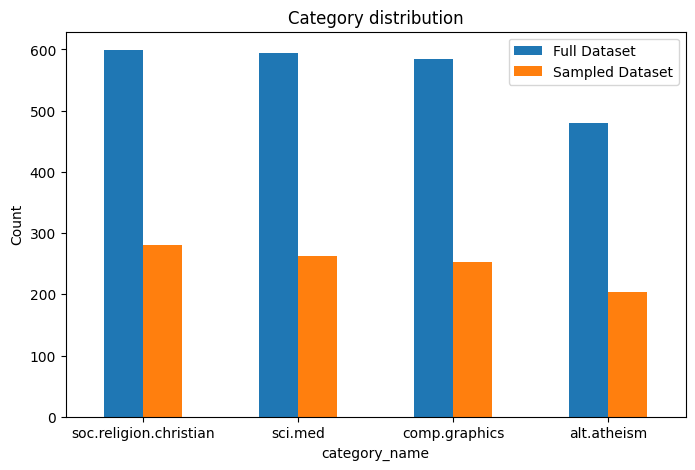

In [402]:
# Answer here
import matplotlib.pyplot as plt
import pandas as pd

original_counts = X['category_name'].value_counts().sort_index(ascending=False)
sample_counts = X_sample['category_name'].value_counts().sort_index(ascending=False)

combined_counts = pd.DataFrame({
    'Full Dataset': original_counts,
    'Sampled Dataset': sample_counts
})

plt.style.use("default");
axis = combined_counts.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Category distribution')
plt.ylabel('Count')

plt.show()

### Exercise 10

In [403]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [404]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [405]:
# Answer here

# Get 5th record
record = X_counts[4].toarray()

# Put the 1's location into a list
num_of_ones = record[0].nonzero()[0]

feature_names = count_vect.get_feature_names_out()

# for index in non_zero_indices:
#     print(f"Index {index}: {feature_names[index]}")

index = num_of_ones[1]  # Get the second index
print(f"Index {index}: {feature_names[index]}")

Index 37: 01


### Exercise 11

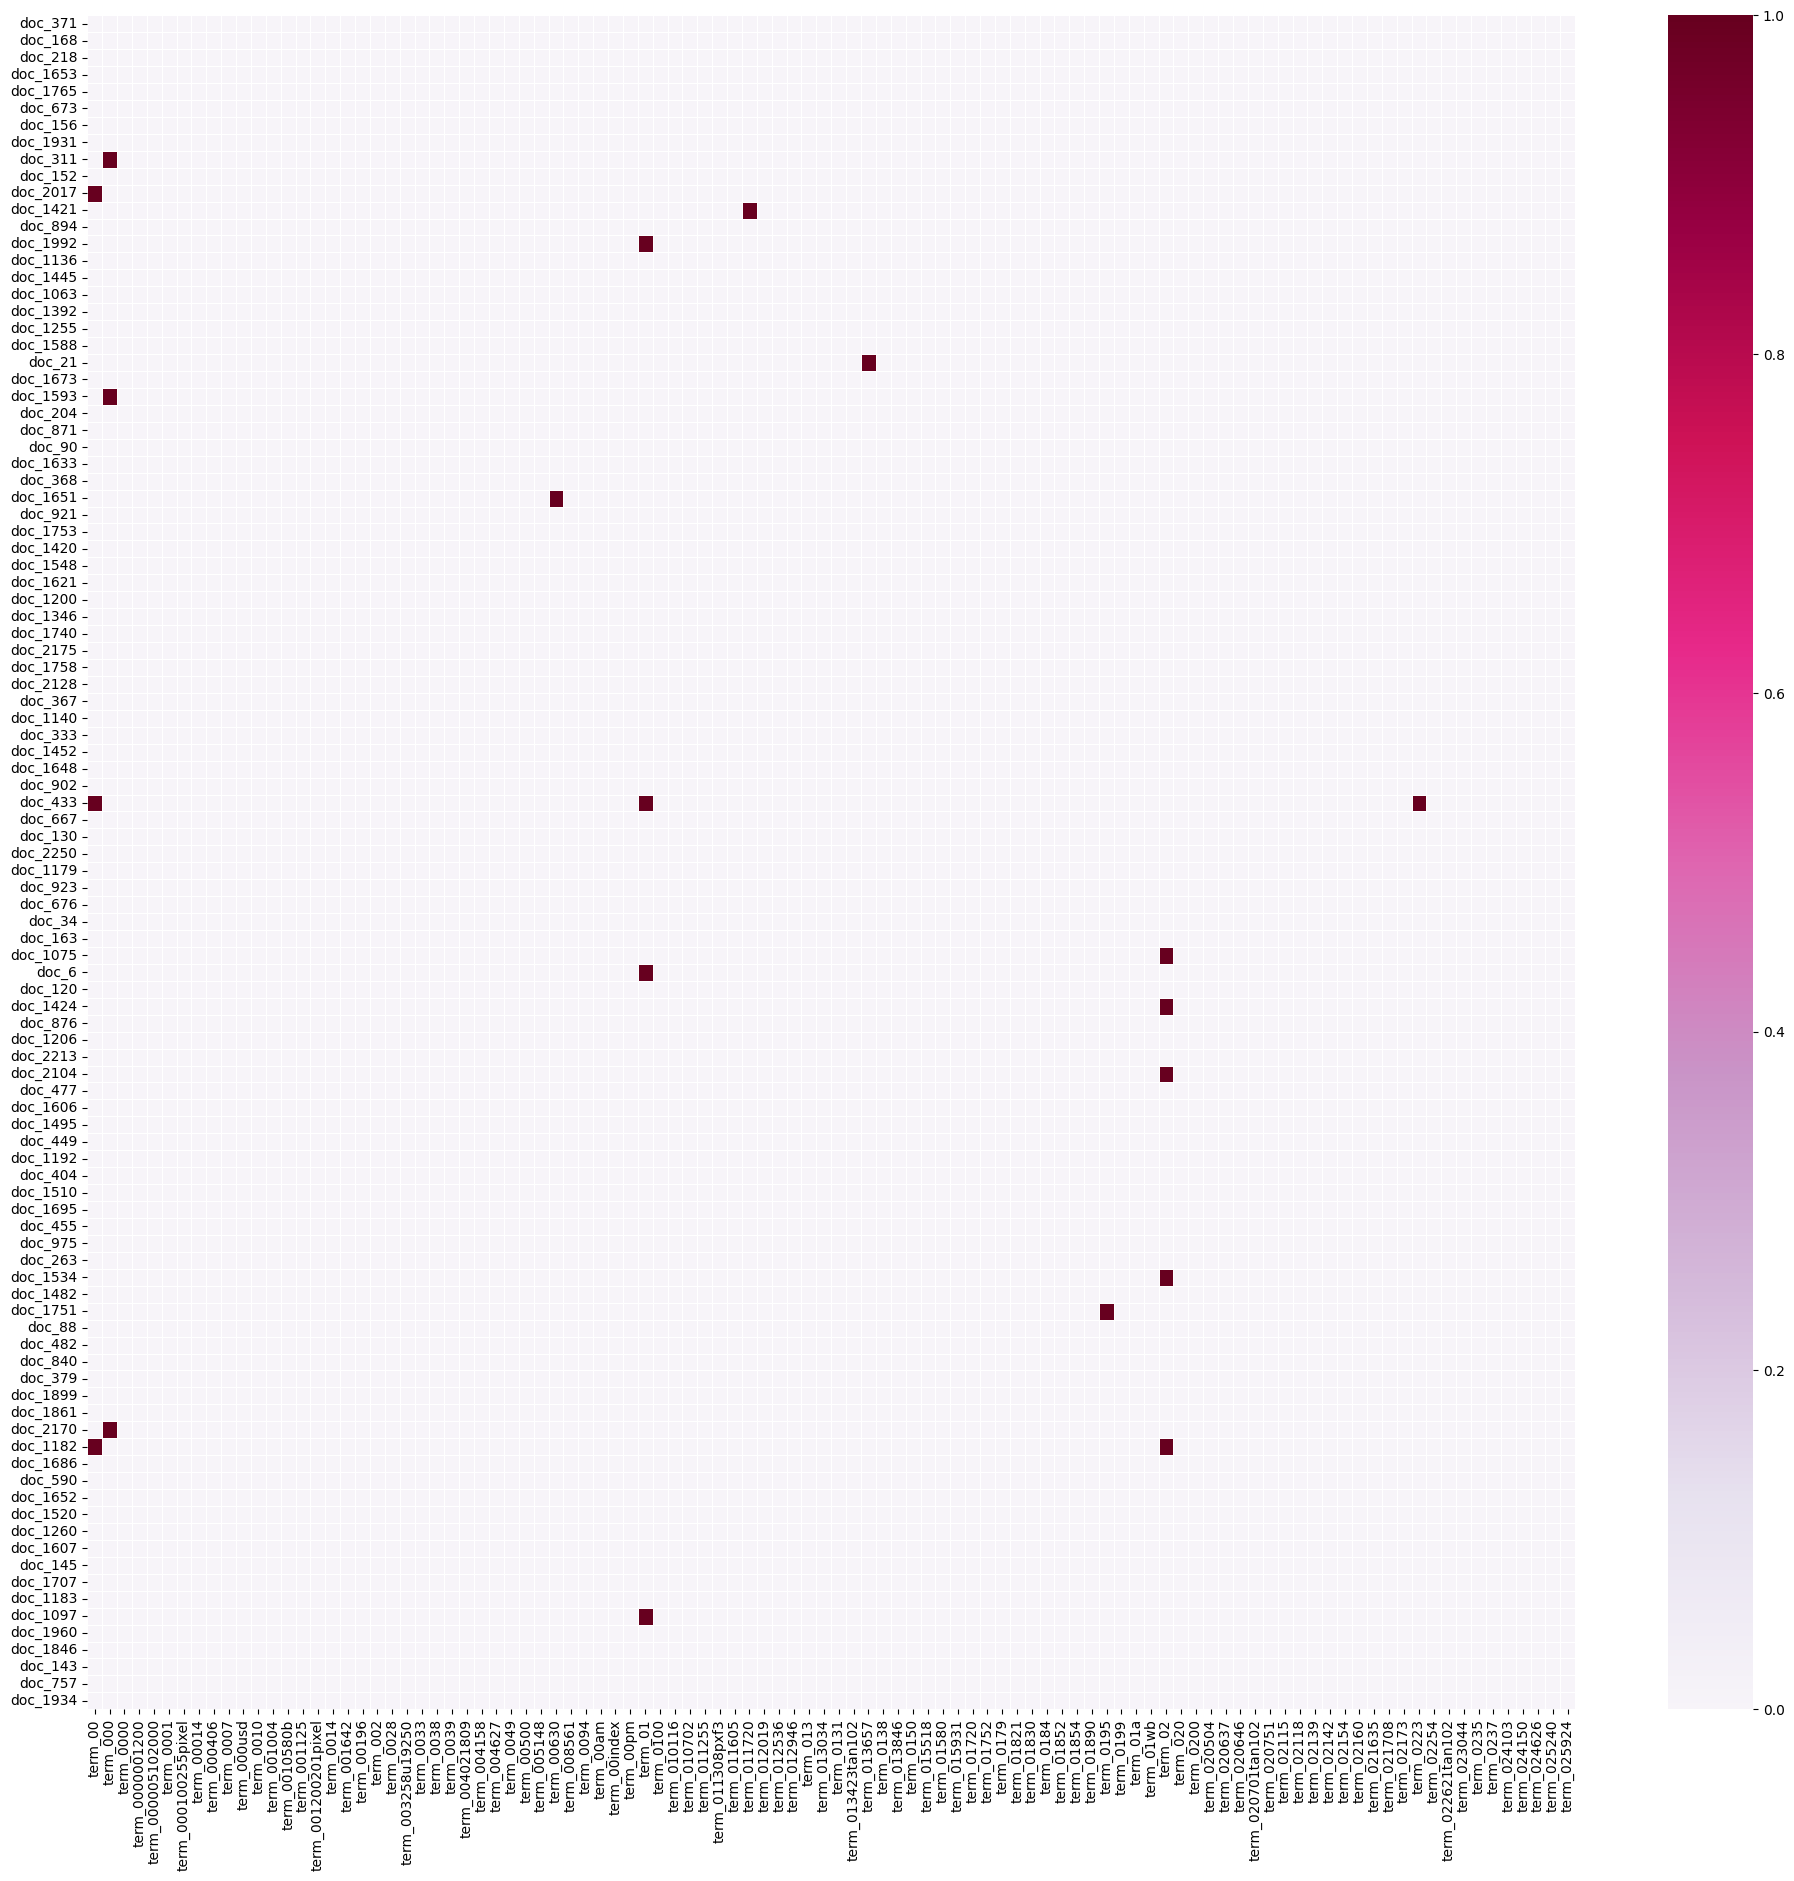

In [406]:
import seaborn as sns

# Use np.random.choice for sampling
doc_sample = np.random.choice(X_counts.shape[0], size=100, replace=False)
# Pick the first 100 terms
term_sample = np.arange(100)

plot_z = X_counts[doc_sample, :][:, term_sample].toarray()

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[term_sample]]
plot_y = ["doc_" + str(i) for i in doc_sample]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Make the figure bigger so I can actually read it
plt.subplots(figsize=(24, 22))
# annot = False to not display the number, linewidths = 0.5 for readability
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False, linewidths=0.5)

### Exercise 12

In [407]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [408]:
# Answer here
import plotly.express as pl

# Get the frequency of terms
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# limit to only 300 entries
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

fig = pl.bar(x=terms, y=frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=4500,
    height=1000,
    showlegend=False
)

fig.show()
# Long chart

### Exercise 13

In [409]:
# Answer here

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Print 100 entries
N = 100 
# Gather the top 100 most frequently used terms
top_term_indices = np.argsort(term_frequencies)[-N:]

top_terms = count_vect.get_feature_names_out()[top_term_indices]
top_frequencies = term_frequencies[top_term_indices]

fig = pl.bar(x=top_terms, y=top_frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1600,
    height=600,
    showlegend=False
)

fig.show()

### Exercise 14

In [410]:
# Answer here

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Print 100 entries
N = 100 
# Gather the top 100 most frequently used terms
top_term_indices = np.argsort(term_frequencies)[-N:]

top_terms = count_vect.get_feature_names_out()[top_term_indices]
top_frequencies = term_frequencies[top_term_indices]

sorted_indices = np.argsort(top_frequencies)[::-1]
sorted_terms = top_terms[sorted_indices]
sorted_frequencies = top_frequencies[sorted_indices]

fig = pl.bar(x=sorted_terms, y=sorted_frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1600,
    height=600,
    showlegend=False
)

fig.show()

### Exercise 15

In [411]:
# Answer here

import math
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Print 100 entries
N = 100 
# Gather the top 100 most frequently used terms
top_term_indices = np.argsort(term_frequencies)[-N:]

top_terms = count_vect.get_feature_names_out()[top_term_indices]
top_frequencies = np.array(term_frequencies_log)[top_term_indices]

sorted_indices = np.argsort(top_frequencies)[::-1]
sorted_terms = top_terms[sorted_indices]
sorted_frequencies = top_frequencies[sorted_indices]

fig = pl.bar(x=sorted_terms, y=sorted_frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1600,
    height=600,
    showlegend=False
)

fig.show()

The most obvious difference would be the number 1 frequency is only 10.303

log function is usually used for normalization so the value wouldn't be too high or too low

Very useful for when disparity between data is huge 

### Exercise 16

In [412]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [413]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

,000,000005102000,000100255pixel,0007,000usd,0010580b,001200201pixel,00196,002,0028,...,zorn,zrz,zsoft,zt,zug,zurich,zvi,zyeh,zyxel,ªl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
# Answer here

The Top 1% contains most commonly used words such as is, and, the, to, etc.

The rest of the Top 5% are are uncommon words such as claims, pagan, open, etc. 

Some of these words are words that are common only in specific context such as:
- pagan in soc.religion.christian category
- genetic in sci.med category

The Bottom 1% contains very rare words that can only be found in that specific category such as:
- initworld in comp.graphics category
- icl in sci.med category

Though for category soc.religion.christian and alt.atheism, there are words that are uncommonly used but not rare such as disqualified

The bottom 1% also contains mistyped words such as plagerize or perfecetly, this can be seen in the alt.atheism category

### Exercise 17

In [ ]:
from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
#from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble           
    #obj = DF2DB(term_document_dfs[category])  
    
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Using the uncommented PAMI import seems to break the comp.graphic .csv file. 

I managed to run it without changing the encoding if I replaced 'td_freq_db_comp_graphics.csv' produced by the code in the kernel above with the .csv the TA gave in the original GitHub

Due to this, just in case, I asked ChatGPT and it recommended me to try using other encoding methods. I tried using different encoding to read the .csv file, it seems using "latin1" encoding works. Uncomment the code in the kernel below and change every 'td_freq_db_comp_graphics.csv' instance with 'td_freq_db_comp_graphics_utf8.csv' to use it.

In [ ]:
# Read CSV with latin1 encoding and save it with utf-8 encoding
# df = pd.read_csv('td_freq_db_comp_graphics.csv', encoding='latin1')
# df.to_csv('td_freq_db_comp_graphics_utf8.csv', index=False, encoding='utf-8')

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
# obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics_utf8.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

In [ ]:
frequentPatternsDF_comp_graphics

In [ ]:
# Answer here

from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
from PAMI.frequentPattern.topk import FAE as topk_alg

# Change .csv input here
input_file = 'td_freq_db_comp_graphics.csv'
# input_file = 'td_freq_db_comp_graphics_utf8.csv'

separator = '\t'

results = pd.DataFrame(columns=['Algorithm', 'Parameter', 'Patterns', 'Runtime', 'Memory'])

minsup = [3, 6, 9]
for min_sup in minsup:
    obj_maxfp = max_alg.MaxFPGrowth(iFile=input_file, minSup=min_sup, sep=separator)
    obj_maxfp.mine()
    
    results.loc[results.shape[0]] = ['MaxFPGrowth', f'minSup={min_sup}', len(obj_maxfp.getPatterns()), obj_maxfp.getRuntime(), obj_maxfp.getMemoryRSS()]
    
    print(f"minSup={min_sup}")
    display(obj_maxfp.getPatternsAsDataFrame())


k_values = [500, 1000, 1500]
for k in k_values:
    obj_fae = topk_alg.FAE(iFile=input_file, k=k, sep=separator)
    obj_fae.mine()

    results.loc[results.shape[0]] = ['FAE', f'k={k}', len(obj_fae.getPatterns()), obj_fae.getRuntime(), obj_fae.getMemoryRSS()]
    
    print(f"Top-K patterns k={k}")
    display(obj_fae.getPatternsAsDataFrame())


# Compare results
print("Comparison of results:")
display(results)

# Compare num of pattern
results.plot(x='Parameter', y='Patterns', kind='bar', title='Patterns discovered')
plt.show()

# Compar runtime
results.plot(x='Parameter', y='Runtime', kind='bar', title='Runtime comparison')
plt.show()

# Compare memory usage
results.plot(x='Parameter', y='Memory', kind='bar', title='Memory usage comparison')
plt.show()

Based on the comparison of results, I got this:
* Differences
    - FPGrowth will return more pattern than MaxFPGrowth
    - FPGrowth takes the longest time to execute
    - Smaller minSup value in MaxFPGrowth will result in more pattern, but longer runtime
    - Higher k-value for FAE Top-k will result in more pattern (obviously), but longer runtime
* Similarities
    - Memory usage for all of the algorithm is not much different from each other
    - FAE Top-k will have similar outputs between number of k's as the output is based on the most number of pattern
* Performances
    - Out of all the algorithms FPGrowth performs the worst
    - Smaller minSup value for MaxFPGrowth will make the runtime higher
    - Higher number of k's for FAE Top-k will make the runtime higher

I have done some research about the 3 algorithms, here are what I got:
- FPGrowth will consider all possible patterns, which is why it performs the worst
- MaxFPGrowth only consider concise and useful patterns
    Ex: Suppose you have a frequent pattern {apple, banana, milk}.
          FPGrowth will return {apple}, {banana}, {apple, banana}, etc.,
          MaxFPGrowth will only return {apple, banana, milk}
- FAE Top-k returns k-number of the most frequent patterns

### Exercise 18

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

In [ ]:
# Answer here

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_aug_for_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_for_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_for_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [ ]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP Comparison(3D)')

def plot_3d(fig, X_reduced, title, subplot_position, elev, azim):
    ax = fig.add_subplot(3, 3, subplot_position, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.view_init(elev=elev, azim=azim)  # Set camera angles
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plot_3d(fig, X_pca_aug_for_3d, 'PCA', 1, elev=30, azim=30)
plot_3d(fig, X_pca_aug_for_3d, 'PCA', 2, elev=40, azim=60)
plot_3d(fig, X_pca_aug_for_3d, 'PCA', 3, elev=-50, azim=60)

plot_3d(fig, X_tsne_aug_for_3d, 't-SNE', 4, elev=40, azim=50)
plot_3d(fig, X_tsne_aug_for_3d, 't-SNE', 5, elev=40, azim=60)
plot_3d(fig, X_tsne_aug_for_3d, 't-SNE', 6, elev=50, azim=-70)

plot_3d(fig, X_umap_aug_for_3d, 'UMAP', 7, elev=60, azim=120)
plot_3d(fig, X_umap_aug_for_3d, 'UMAP', 8, elev=40, azim=60)
plot_3d(fig, X_umap_aug_for_3d, 'UMAP', 9, elev=40, azim=-60)

plt.show()

The overall structure of the 3D plots are quite different from the 2D ones. The PCA one is the most similar.

By manipualting the azim paraementer, soc.religion.christian and sci.med are more visible using postive azim, while comp.graphics and alt.atheism are movisible using negative azim

### Exercise 19

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category']).tolist()

X[0:9]

In [ ]:
# Answer here
mlb = preprocessing.LabelBinarizer()

mlb.fit(X['category_name'])

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

X[0:9]

It does work, however, from the first 9 outputs it seems that the binarization output for both the category and category_name are the same

# DMLab1-homework Code

In [ ]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## Data Preperation

In [ ]:
import pandas as pd

# Read dataser
df_X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

df_X

In [ ]:
# display the first 3 comments
pd.set_option('display.max_colwidth', None)
df_X[:3]

## Data Transformation

In [ ]:
pd.reset_option('display.max_colwidth')

# Simple query
df_X[:10]

In [ ]:
# Last 10 records
df_X[-10:]

In [ ]:
# using loc (by label)
df_X.loc[:10, 'comment']

In [ ]:
# using iloc (by position)
df_X.iloc[:10, 1]

In [ ]:
# Filter rows by sentiment
df_X[df_X['sentiment'] == 'nostalgia']

# Huh, the data is split evenly between "nostalgia" and "not nostalgia"

In [ ]:
# Filter rows where text contains specified word
df_X[df_X['comment'].str.contains('Elvis', case=False, na=False)]

# That's quite a lot of Elvis

In [ ]:
# Using .query() method
df_X.query("sentiment == 'not nostalgia'")

In [ ]:
# Query for text above 500 words
df_X.query("comment.str.len() > 200")

In [ ]:
# fetch records belonging to the nostalgia sentiment, and query every 10th record. Only show the first 5 records.
df_X[df_X["sentiment"] == "nostalgia"].iloc[::10]

## Detect Missing values or duplicated data

In [ ]:
# check missing values
df_X.isnull()

In [ ]:
import helpers.data_mining_helpers as dmh
df_X.isnull().apply(lambda x: dmh.check_missing_values(x))

In [ ]:
df_X.duplicated()

In [ ]:
# Check for the total number of duplication
sum(df_X.duplicated())

In [ ]:
# Check for duplication in comment column
sum(df_X.duplicated('comment'))

# Waw, there is actually a duplicated comment

In [ ]:
duplicated_comment = df_X[df_X.duplicated('comment', keep=False)]

# Display the duplicated comment
duplicated_comment

In [ ]:
# Drop the duplicated comment
df_X.drop_duplicates(keep=False, inplace=True)

# Check for the total number of duplication again
sum(df_X.duplicated())

In [ ]:
len(df_X)

## Data Preprocessing

### Sampling

In [ ]:
# Sample data
df_X_sample = df_X.sample(n=700)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Draw comparison plot of the original data vs. sample data
original_counts = df_X['sentiment'].value_counts().sort_index(ascending=False)
sample_counts = df_X_sample['sentiment'].value_counts().sort_index(ascending=False)

combined_counts = pd.DataFrame({
    'Full Dataset': original_counts,
    'Sampled Dataset': sample_counts
})

plt.style.use("default");
axis = combined_counts.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Category distribution')
plt.ylabel('Count')

plt.show()


### Feature creation

In [ ]:
import nltk
# Use nltk library to tokenize the comment from the dataset
df_X['unigrams'] = df_X['comment'].apply(lambda x: dmh.tokenize_text(x))

df_X[0:4]

In [ ]:
# List the tokenized comment of the first entry
list(df_X[0:1]['unigrams'])

### Feature subset selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer()
df_X_counts = c_vec.fit_transform(df_X.comment) #learn the vocabulary and return document-term matrix

In [ ]:
# Using built in built_analyzer to tokenize df_X comment
analyze = c_vec.build_analyzer()
analyze(df_X.comment[0])

In [ ]:
df_X_counts[0:5, 0:100].toarray()

In [ ]:
# Using my previous code

record = df_X_counts[3].toarray()
num_of_ones = record[0].nonzero()[0]

feature_names = c_vec.get_feature_names_out()

# for index in non_zero_indices:
#     print(f"Index {index}: {feature_names[index]}")

index = num_of_ones[1]  # Get the second index
print(f"Index {index}: {feature_names[index]}")

In [ ]:
import seaborn as sns
import numpy as np
# Using seaborn to plot the frequency

# Use np.random.choice for sampling
doc_sample = np.random.choice(df_X_counts.shape[0], size=100, replace=False)
# Pick the first 100 terms (Not randomized)
term_sample = np.arange(100)

plot_z = df_X_counts[doc_sample, :][:, term_sample].toarray()

plot_x = ["term_" + str(i) for i in c_vec.get_feature_names_out()[term_sample]]
plot_y = ["doc_" + str(i) for i in doc_sample]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Make the figure bigger so I can actually read it
plt.subplots(figsize=(24, 22))
# annot = False to not display the number, linewidths = 0.5 for readability
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False, linewidths=0.5)

### Attribute Transformation / Aggregation

In [ ]:
term_frequencies = []
for j in range(0,df_X_counts.shape[1]):
    term_frequencies.append(sum(df_X_counts[:,j].toarray()))

In [ ]:
import plotly.express as pl

# Plot the frequency of the terms into a bar chart using plotly library
term_frequencies = np.asarray(df_X_counts.sum(axis=0))[0]

# Print 100 entries
N = 100 
# Gather the top 100 most frequently used terms
top_term_indices = np.argsort(term_frequencies)[-N:]

top_terms = c_vec.get_feature_names_out()[top_term_indices]
top_frequencies = term_frequencies[top_term_indices]

sorted_indices = np.argsort(top_frequencies)[::-1]
sorted_terms = top_terms[sorted_indices]
sorted_frequencies = top_frequencies[sorted_indices]

fig = pl.bar(x=sorted_terms, y=sorted_frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1600,
    height=600,
    showlegend=False
)

fig.show()

In [ ]:
import math

# Normalize the frequencies using log function
term_frequencies = np.asarray(df_X_counts.sum(axis=0))[0]
term_frequencies_normalized = [math.log(i) for i in term_frequencies]

# Print 100 entries
N = 100 
# Gather the top 100 most frequently used terms
top_term_indices = np.argsort(term_frequencies)[-N:]

top_terms = c_vec.get_feature_names_out()[top_term_indices]
top_frequencies = np.array(term_frequencies_normalized)[top_term_indices]

sorted_indices = np.argsort(top_frequencies)[::-1]
sorted_terms = top_terms[sorted_indices]
sorted_frequencies = top_frequencies[sorted_indices]

fig = pl.bar(x=sorted_terms, y=sorted_frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1600,
    height=600,
    showlegend=False
)

fig.show()

#### New Data Visualization - Using WordCloud(!!!Part 3)

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary with the top terms and their corresponding frequencies
term_frequency_dict = {term: freq for term, freq in zip(sorted_terms, sorted_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(term_frequency_dict)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Top 100 Terms Word Cloud", fontsize=18)
plt.show()


### Finding frequent patterns

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df_X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df_X[df_X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    c_vec = CountVectorizer()  # Initialize the CountVectorizer
    df_X_counts = c_vec.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = c_vec.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

This dataset and previous dataset shows diferrent filtered words, such as
- The Top 1% is the same, both dataset include very commonly used words
- The Bottom 1% however is not the same, most of the bottom 1% are uncommon words just not used much in the dataset.
- The Bottom 1% also include possible name or place name such as "montgomery" or "mitch"

### Using PAMI

In [ ]:
from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
#from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace white space with underscores in the sentiment (especially not nostalgia)
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble           
    #obj = DF2DB(term_document_dfs[category])  
    
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

# Will generate "td_freq_db_nostalgia.csv" and "td_freq_db_not_nostalgia.csv"

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [ ]:
# Mine pattern in "nostalgia" sentiment using FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
nos_obj = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
nos_obj.mine()
frequentPatternsDF_nos= nos_obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nos))) #print the total number of patterns
print('Runtime: ' + str(nos_obj.getRuntime())) #measure the runtime

In [ ]:
nos_obj.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nos

In [ ]:
# Mine pattern in "not nostalgia" sentiment using FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
not_nos_obj = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
not_nos_obj.mine()
frequentPatternsDF_not_nos= not_nos_obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nos))) #print the total number of patterns
print('Runtime: ' + str(not_nos_obj.getRuntime())) #measure the runtime

In [ ]:
not_nos_obj.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nos

In [ ]:
# Using MaxFPGrowth and FAE 
from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
from PAMI.frequentPattern.topk import FAE as topk_alg

# Change .csv input here
input_file = 'td_freq_db_nostalgia.csv'
# input_file = 'td_freq_db_not_nostalgia.csv'

separator = '\t'

results = pd.DataFrame(columns=['Algorithm', 'Parameter', 'Patterns', 'Runtime', 'Memory'])

minsup = [3, 6, 9]
for min_sup in minsup:
    obj_maxfp = max_alg.MaxFPGrowth(iFile=input_file, minSup=min_sup, sep=separator)
    obj_maxfp.mine()
    
    results.loc[results.shape[0]] = ['MaxFPGrowth', f'minSup={min_sup}', len(obj_maxfp.getPatterns()), obj_maxfp.getRuntime(), obj_maxfp.getMemoryRSS()]
    
    print(f"minSup={min_sup}")
    display(obj_maxfp.getPatternsAsDataFrame())


k_values = [250, 500, 750]
for k in k_values:
    obj_fae = topk_alg.FAE(iFile=input_file, k=k, sep=separator)
    obj_fae.mine()

    results.loc[results.shape[0]] = ['FAE', f'k={k}', len(obj_fae.getPatterns()), obj_fae.getRuntime(), obj_fae.getMemoryRSS()]
    
    print(f"Top-K patterns k={k}")
    display(obj_fae.getPatternsAsDataFrame())


# Compare results
print("Comparison of results:")
display(results)

# Compare num of pattern
results.plot(x='Parameter', y='Patterns', kind='bar', title='Patterns discovered')
plt.show()

# Compar runtime
results.plot(x='Parameter', y='Runtime', kind='bar', title='Runtime comparison')
plt.show()

# Compare memory usage
results.plot(x='Parameter', y='Memory', kind='bar', title='Memory usage comparison')
plt.show()

### Dimentionality Reduction

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
nos_dfs = [frequentPatternsDF_nos, frequentPatternsDF_not_nos]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in nos_dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count_t = sum(len(df) for df in nos_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count_t - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in nos_dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
c_vec = CountVectorizer()
X_tdm = c_vec.fit_transform(df_X['comment'])
terms = c_vec.get_feature_names_out()

# Tokenize the sentences into sets of unique words
df_X['tokenized_comment'] = df_X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df_X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Plot 2D Graph

# Apply PCA, t-SNE, and UMAP
df_X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_X_pca_tdm, 'PCA')
plot_scatter(axes[1], df_X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_X_umap_tdm, 'UMAP')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Plot 2D Graph

# Apply PCA, t-SNE, and UMAP
df_X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_X_pca_aug, 'PCA')
plot_scatter(axes[1], df_X_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_X_umap_aug, 'UMAP')

plt.show()

In [ ]:
# Plot 3D Graph

# Apply PCA, t-SNE, and UMAP
df_X_pca_aug_for_3d = PCA(n_components=3).fit_transform(augmented_df.values)
df_X_tsne_aug_for_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
df_X_umap_aug_for_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [ ]:
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP Comparison(3D)')

def plot_3d(fig, X_reduced, title, subplot_position, elev, azim):
    ax = fig.add_subplot(3, 3, subplot_position, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        zs = X_reduced[df_X['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.view_init(elev=elev, azim=azim)  # Set camera angles
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plot_3d(fig, df_X_pca_aug_for_3d, 'PCA', 1, elev=30, azim=30)
plot_3d(fig, df_X_pca_aug_for_3d, 'PCA', 2, elev=40, azim=60)
plot_3d(fig, df_X_pca_aug_for_3d, 'PCA', 3, elev=-50, azim=60)

plot_3d(fig, df_X_tsne_aug_for_3d, 't-SNE', 4, elev=40, azim=50)
plot_3d(fig, df_X_tsne_aug_for_3d, 't-SNE', 5, elev=40, azim=60)
plot_3d(fig, df_X_tsne_aug_for_3d, 't-SNE', 6, elev=50, azim=-70)

plot_3d(fig, df_X_umap_aug_for_3d, 'UMAP', 7, elev=60, azim=120)
plot_3d(fig, df_X_umap_aug_for_3d, 'UMAP', 8, elev=40, azim=60)
plot_3d(fig, df_X_umap_aug_for_3d, 'UMAP', 9, elev=40, azim=-60)

plt.show()

### Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb_prep = preprocessing.LabelBinarizer()
mlb_prep.fit(df_X.sentiment)
df_X['bin_sentiment'] = mlb_prep.transform(df_X['sentiment']).tolist()

df_X[0:9]

## Data Exploration

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df_X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = c_vec.transform(document_to_transform_1)
document_vector_count_2 = c_vec.transform(document_to_transform_2)
document_vector_count_3 = c_vec.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

## Data Classification  (!!!Part 3)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

unique_sentiments = df_X['sentiment'].unique()

category_mapping = {index: sentiment for index, sentiment in enumerate(unique_sentiments)}

# Use the sorted indices to create target names
target_names = [category_mapping[i] for i in range(len(category_mapping))]

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_X['sentiment'], test_size=0.3, random_state=42)

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

unique_sentiments = df_X['sentiment'].unique()

category_mapping = {index: sentiment for index, sentiment in enumerate(unique_sentiments)}

# Use the sorted indices to create target names
target_names = [category_mapping[i] for i in range(len(category_mapping))]

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_X['sentiment'], test_size=0.3, random_state=42)

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

# Using TF - IDF on new dataset (!!!Part 3)

### Feature subset selection

In [ ]:
# Using Tf-IDf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vector
tfidf_vect = TfidfVectorizer()
df_X_tfidf = tfidf_vect.fit_transform(df_X.comment)

print(df_X_tfidf[0])

The main difference between this TF-IDF Vectorizer and the Count Vetorizer is,
- TF-IDF vectorizer gives the TD-IDF values of terms from the comment, highlighting the importance
- Also, TF-IDF vectorizer gives type float64 output
- Count Vectorizer gives raw values, and the output is in type int64

In [ ]:
tfidf_vect.get_feature_names_out()[0:10]

In [ ]:
df_X_tfidf[0:5, 0:100].toarray()

In [ ]:
# Focus on the 4th entry
record = df_X_tfidf[3].toarray()
num_of_non_zeros = record[0].nonzero()[0]

feature_names = tfidf_vect.get_feature_names_out()

# for index in non_zero_indices:
#     print(f"Index {index}: {feature_names[index]}")

index = num_of_non_zeros[3]  # Get the second index
print(f"Index {index}: {feature_names[index]}")

In [ ]:
# Make diagram using the TF-IDF vectorizer

import numpy as np
import seaborn as sns
# Use np.random.choice for sampling
doc_sample = np.random.choice(df_X_tfidf.shape[0], size=100, replace=False)
# Pick the first 100 terms
term_sample = np.arange(100)

plot_z = df_X_tfidf[doc_sample, :][:, term_sample].toarray()

plot_x = ["term_" + str(i) for i in tfidf_vect.get_feature_names_out()[term_sample]]
plot_y = ["doc_" + str(i) for i in doc_sample]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Make the figure bigger so I can actually read it
plt.subplots(figsize=(24, 22))
# annot = False to not display the number, linewidths = 0.5 for readability
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False, linewidths=0.5)

After a bit of research and based on the not really that informative diagram above,
- High TF-IDF score means the term is unique but still commonly used
- Lower TF-IDF score means the term is not unique

### Attribute Transformation / Aggregation

In [ ]:
term_frequencies = []
for j in range(0,df_X_tfidf.shape[1]):
    term_frequencies.append(sum(df_X_tfidf[:,j].toarray()))

In [ ]:
import plotly.express as pl

# Gather the top-100 frequencies
term_frequencies = np.asarray(df_X_tfidf.sum(axis=0))[0]

# Print 100 entries
N = 100 
# Gather the top 100 most frequently used terms
top_term_indices = np.argsort(term_frequencies)[-N:]

top_terms = tfidf_vect.get_feature_names_out()[top_term_indices]
top_frequencies = term_frequencies[top_term_indices]

sorted_indices = np.argsort(top_frequencies)[::-1]
sorted_terms = top_terms[sorted_indices]
sorted_frequencies = top_frequencies[sorted_indices]

fig = pl.bar(x=sorted_terms, y=sorted_frequencies, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_layout(
    xaxis_tickangle=-90,
    width=1600,
    height=600,
    showlegend=False
)

fig.show()

#### New Data Visualization - Using wordCloud (!!!Part 3)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Create a dictionary with the top terms and their corresponding frequencies
term_frequency_dict = {term: freq for term, freq in zip(sorted_terms, sorted_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(term_frequency_dict)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Top 100 Terms Word Cloud", fontsize=18)
plt.show()


From the plotly chart above, verhy very common terms such as "the", "this", "to" still dominates the chart.

However, I noticed something that might be related to TF-IDF. The term "and" is now lower in rank than the term "song and "my" compared to the chart using Count Vectorizer. This  means that TF-IDF is doing its job by focusing more on more meaningful terms that differentiate comments from each other such as, the term "song" is likely talking about anything related to music, compared to the term "and" which is universally used on all comments

### Finding frequent patterns

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each category
categories = df_X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df_X[df_X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    tfidf_vect = TfidfVectorizer()  # Initialize the CountVectorizer
    df_X_counts = tfidf_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = tfidf_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

The Top 1% are still dominated by commonly used terms like "the" or "to". However, uysing TF-IDF we can see what most of the dataset is about, for example, "song" for both nostalgia and not nostalgia is in the Top 5, hinting that many of the dataset is related to music. Also you can see that some of the tems are related to their sentiments, like "memory" is in the Top 5% of the nostaliga sentiment

I skipped most of the PAMI part here and only sue the one that uses Count Vectorizer in the original and replace them with TF-IDF Vectorizer

In [ ]:
from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
#from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    print(term_document_dfs[category].sum()) 
    # Replace white space with underscores in the sentiment (especially not nostalgia)
    category_safe = category.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble           
    #obj = DF2DB(term_document_dfs[category])  
    
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}_tfidf.csv', '>=', 0.1)

# Will generate "td_freq_db_nostalgia_tfidf.csv" and "td_freq_db_not_nostalgia_tfidf.csv"

In [ ]:
# Mine pattern in "nostalgia" sentiment using FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
nos_obj = alg.FPGrowth(iFile='td_freq_db_nostalgia_tfidf.csv', minSup=minSup)
nos_obj.mine()
frequentPatternsDF_nos= nos_obj.getPatternsAsDataFrame()

# Mine pattern in "not nostalgia" sentiment using FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
not_nos_obj = alg.FPGrowth(iFile='td_freq_db_not_nostalgia_tfidf.csv', minSup=minSup)
not_nos_obj.mine()
frequentPatternsDF_not_nos= not_nos_obj.getPatternsAsDataFrame()

### Dimentionality Reduction

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
nos_dfs = [frequentPatternsDF_nos, frequentPatternsDF_not_nos]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in nos_dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in nos_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in nos_dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
tfidf_vect = TfidfVectorizer()
X_tdm = tfidf_vect.fit_transform(df_X['comment'])
terms = tfidf_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
df_X['tokenized_comment'] = df_X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df_tfidf = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df_X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df_tfidf = pd.concat([tdm_df_tfidf, pattern_matrix], axis=1)

augmented_df_tfidf 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP
df_X_pca_tdm_tfidf = PCA(n_components=2).fit_transform(tdm_df_tfidf.values)
df_X_tsne_tdm_tfidf = TSNE(n_components=2).fit_transform(tdm_df_tfidf.values)
df_X_umap_tdm_tfidf = umap.UMAP(n_components=2).fit_transform(tdm_df_tfidf.values)

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_X_pca_tdm_tfidf , 'PCA')
plot_scatter(axes[1], df_X_tsne_tdm_tfidf , 't-SNE')
plot_scatter(axes[2], df_X_umap_tdm_tfidf , 'UMAP')

plt.show()

In [ ]:
# Plot 2D Graph

# Apply PCA, t-SNE, and UMAP on augmented data
df_X_pca_aug_tfidf = PCA(n_components=2).fit_transform(augmented_df_tfidf.values)
df_X_tsne_aug_tfidf = TSNE(n_components=2).fit_transform(augmented_df_tfidf.values)
df_X_umap_aug_tfidf = umap.UMAP(n_components=2).fit_transform(augmented_df_tfidf.values)

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_X_pca_aug_tfidf , 'PCA')
plot_scatter(axes[1], df_X_tsne_aug_tfidf , 't-SNE')
plot_scatter(axes[2], df_X_umap_aug_tfidf , 'UMAP')

plt.show()

In [ ]:
# Plot 3D Graph

# Apply PCA, t-SNE, and UMAP
df_X_pca_aug_for_3d_tfidf = PCA(n_components=3).fit_transform(augmented_df_tfidf.values)
df_X_tsne_aug_for_3d_tfidf = TSNE(n_components=3).fit_transform(augmented_df_tfidf.values)
df_X_umap_aug_for_3d_tfidf = umap.UMAP(n_components=3).fit_transform(augmented_df_tfidf.values)

In [ ]:
col = ['coral', 'blue']
categories = df_X['sentiment'].unique() 

fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP Comparison(3D)')

def plot_3d(fig, X_reduced, title, subplot_position, elev, azim):
    ax = fig.add_subplot(3, 3, subplot_position, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[df_X['sentiment'] == category].T[0]
        ys = X_reduced[df_X['sentiment'] == category].T[1]
        zs = X_reduced[df_X['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.view_init(elev=elev, azim=azim)  # Set camera angles
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

plot_3d(fig, df_X_pca_aug_for_3d_tfidf , 'PCA', 1, elev=30, azim=30)
plot_3d(fig, df_X_pca_aug_for_3d_tfidf , 'PCA', 2, elev=40, azim=60)
plot_3d(fig, df_X_pca_aug_for_3d_tfidf , 'PCA', 3, elev=-50, azim=60)

plot_3d(fig, df_X_tsne_aug_for_3d_tfidf , 't-SNE', 4, elev=40, azim=50)
plot_3d(fig, df_X_tsne_aug_for_3d_tfidf , 't-SNE', 5, elev=40, azim=60)
plot_3d(fig, df_X_tsne_aug_for_3d_tfidf , 't-SNE', 6, elev=50, azim=-70)

plot_3d(fig, df_X_umap_aug_for_3d_tfidf , 'UMAP', 7, elev=60, azim=120)
plot_3d(fig, df_X_umap_aug_for_3d_tfidf , 'UMAP', 8, elev=40, azim=60)
plot_3d(fig, df_X_umap_aug_for_3d_tfidf , 'UMAP', 9, elev=40, azim=-60)

plt.show()

### Data Classification (!!!Part 3)

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb_prep = preprocessing.LabelBinarizer()
mlb_prep.fit(df_X.sentiment)
df_X['bin_sentiment'] = mlb_prep.transform(df_X['sentiment']).tolist()

df_X[0:9]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

unique_sentiments = df_X['sentiment'].unique()

category_mapping = {index: sentiment for index, sentiment in enumerate(unique_sentiments)}

# Use the sorted indices to create target names
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df_tfidf, df_X['sentiment'], test_size=0.3, random_state=42)

len(df_X)

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

unique_sentiments = df_X['sentiment'].unique()

category_mapping = {index: sentiment for index, sentiment in enumerate(unique_sentiments)}

# Use the sorted indices to create target names
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df_tfidf, df_X['sentiment'], test_size=0.3, random_state=42)

category_mapping

In [ ]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

For normal word counts in the classifier I used MultinomialNB and in the TF-IDF I used BernoulliNB. Here are the differences:
- BernoulliNB
  * Works with binary features, meaning it treats the presence or absence of a word in a document as a binary value (0 or 1).
  * The model considers whether a word appears in a document, regardless of how many times it appears. If a word is present, it is given a value of 1; otherwise, it is given a value of 0.
- MultinomialNB
  * Works with count-based features, meaning it considers the frequency of each word in a document.
  * It uses the actual counts of the terms in the document, so terms that appear more frequently contribute more to the classification.

From these differences, it seems that for the new dataset, overall, BernoulliNB works better than Multinomial. Perhaps this is due to the new data set having less data and only 2 kinds of category (sentiments). While MultinomialNB works better in the master dataset as it has more data and also 4 kinds of categories.

# !!!Part 4

Let's start with minor details.
- The imports should be put on the top of the kernels
- It might be better to seperate functions in seperate kernels

I have found some other problem with the code.
* Problems
    - When using the new dataset, augmented_df have lower accuracy than tdm_df accuracy when using NB classifier. I found out that 'final_pattern_df' is appended to tdm_df to make the augmented_df. final_pattern_df filters the data based on their uniqueness. In the new dataset, it seems that this filtering method introduce more noise than the original tdm_df, leading to lower accuracy. I could think of some other way of filtering the data, such as
      * Filter based on the number of words in each pattern. For example, you could discard very short patterns.
      * Pattern filtering based on combined weight(s), especially when using TF-IDF
    - This one might not be that significant but for handing duplicates, I think it would be better to keep 1 entry of the duplicates. THe method introduced is deletes all duplicated entries which might cause a problem when there are a lot of duplication
      
* Improvements
    - There are some other minor data preprocessing we could do like make sure all the words are in lower case. In the new data set I noticed that some of the text includes full upper case sentences like "i HAVE ALSO LISTENED TO..." which will be recognized as different pattern to the lower case counterpart
    - In the preprocess, we can also normalize the value using log. There is a part where this normalization happens but it is only used to make a plot. I think that normalization with log doesn't have to be done in the TF-IDF, however we can apply min-max scaling to improve the normalization or the TF-IDF weight further